# Compare different discount functions
The primary aim was to analyse the raw delay discounting data using the Hyperbolic discount function. Howevever, it is prudent to check that the $\log(k)$ parameter estimates from the hyperbolic discount function are good. To do this we look at Log Loss and WAIC measures from all the discount funtions:
- **Log loss:** This is the appropriate metric (of goodness of fit) for classification data where we predict a probability of choosing the delayed reward. As a measure of goodness of fit however, it does not take into account the number of parameters.
- **WAIC:** We examine the WAIC score, which is an information criteria in the same vein as AIC and BIC. It is a little more 'advanced' in that it takes the precision of the parameter estimates into account. For example, AIC and BIC are based on a single likelihood score for the maximum likelihood discounting parameters, but WAIC takes the full posterior distribution over parameters into account.

In [25]:
import pandas as pd
import numpy as np
import dabest
import pymc3  # for hpd

# plotting
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

Import and process data

In [2]:
temp = [pd.read_csv('parameter_estimation_Exponential.csv'),
        pd.read_csv('parameter_estimation_Hyperbolic.csv'),
        pd.read_csv('parameter_estimation_ModifiedRachlin.csv'),
        pd.read_csv('parameter_estimation_Hyperboloid.csv')]

data = pd.concat(temp, axis=0, ignore_index=True, sort=False)
data.head()

,id,commodity,condition,model,log_loss,AUC,WAIC,roc_auc,k,logk,s
0,JL,food,C,Exponential,0.156205,0.989094,13.885116,0.982722,0.000732,NaN,NaN
1,BJ,money,C,Exponential,0.303042,0.982029,25.247291,0.947829,0.001213,NaN,NaN
2,PF,food,C,Exponential,0.285508,0.935131,24.150502,0.949878,0.004522,NaN,NaN
3,LS,money,C,Exponential,0.400888,0.949418,31.816975,0.881805,0.003491,NaN,NaN
4,DN,money,C,Exponential,NaN,0.999115,1.714244,NaN,0.000059,NaN,NaN


## Examine goodness of fit: Log Loss metric

### Visualisation of log loss

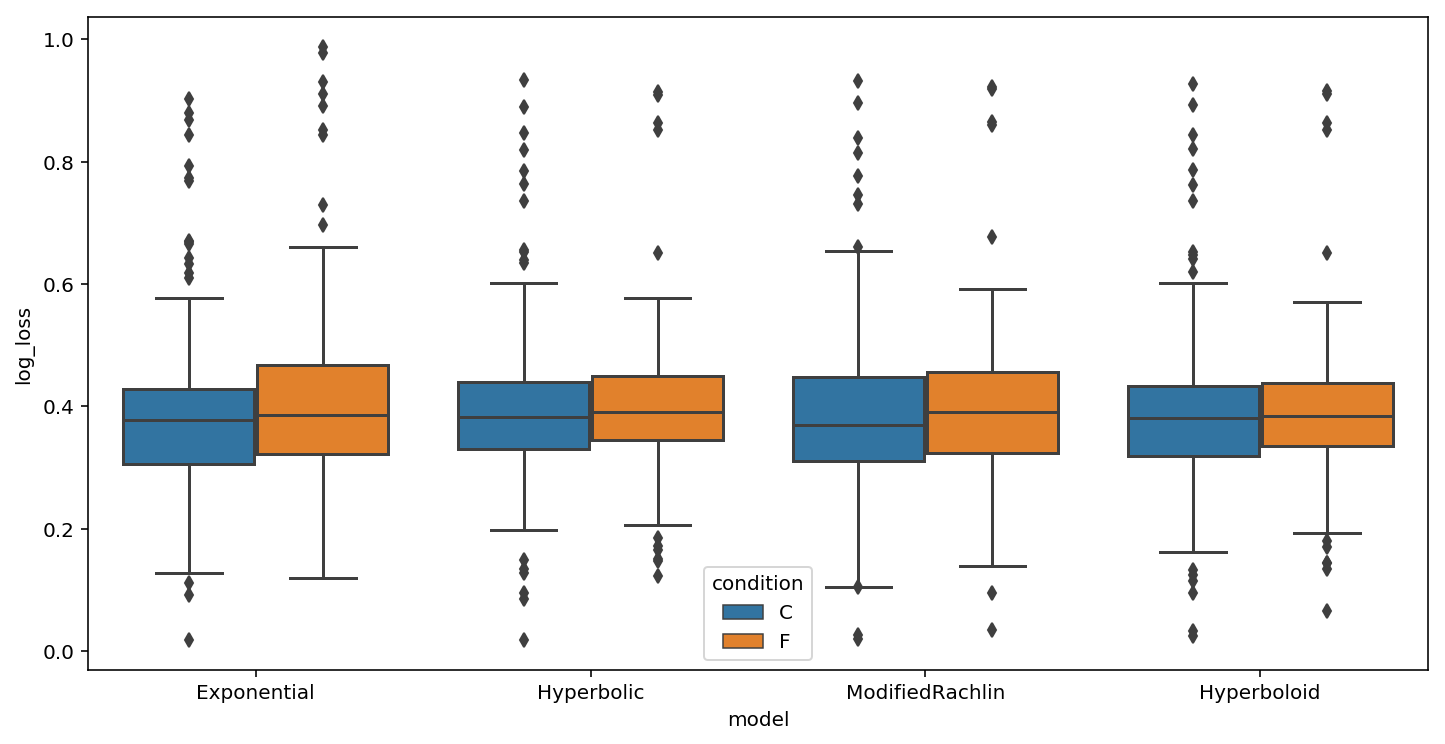

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.boxplot(x='model', y='log_loss', hue='condition', data=data, ax=ax)

# fig.savefig('log_loss.pdf', bbox_inches='tight')

From visual inspection we do not have any clear differences in the goodness of fit measure per discount function or with condition.

### Quantitative look at log loss for different discount functions
Let's use `dabest` to see if there are any quantitative differences between the log loss metric for each discount functions.

In [4]:
ll = {'Exponential': data['log_loss'][data['model']=='Exponential'].values,
      'Hyperbolic': data['log_loss'][data['model']=='Hyperbolic'].values,
      'ModifiedRachlin': data['log_loss'][data['model']=='ModifiedRachlin'].values, 
      'Hyperboloid': data['log_loss'][data['model']=='Hyperboloid'].values}
ll = pd.DataFrame.from_dict(ll)

,control,test,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Hyperbolic,Exponential,mean difference,False,0.000953,95,-0.021619,0.024751,0.935528,-0.080927,0.935528,-0.080927,0.302991,44129.0
1,Hyperbolic,ModifiedRachlin,mean difference,False,-0.015651,95,-0.037754,0.007110,0.175266,1.357165,0.175258,1.357165,0.187681,44709.0
2,Hyperbolic,Hyperboloid,mean difference,False,-0.011554,95,-0.032958,0.010696,0.296770,1.044330,0.296769,1.044330,0.164883,44853.0


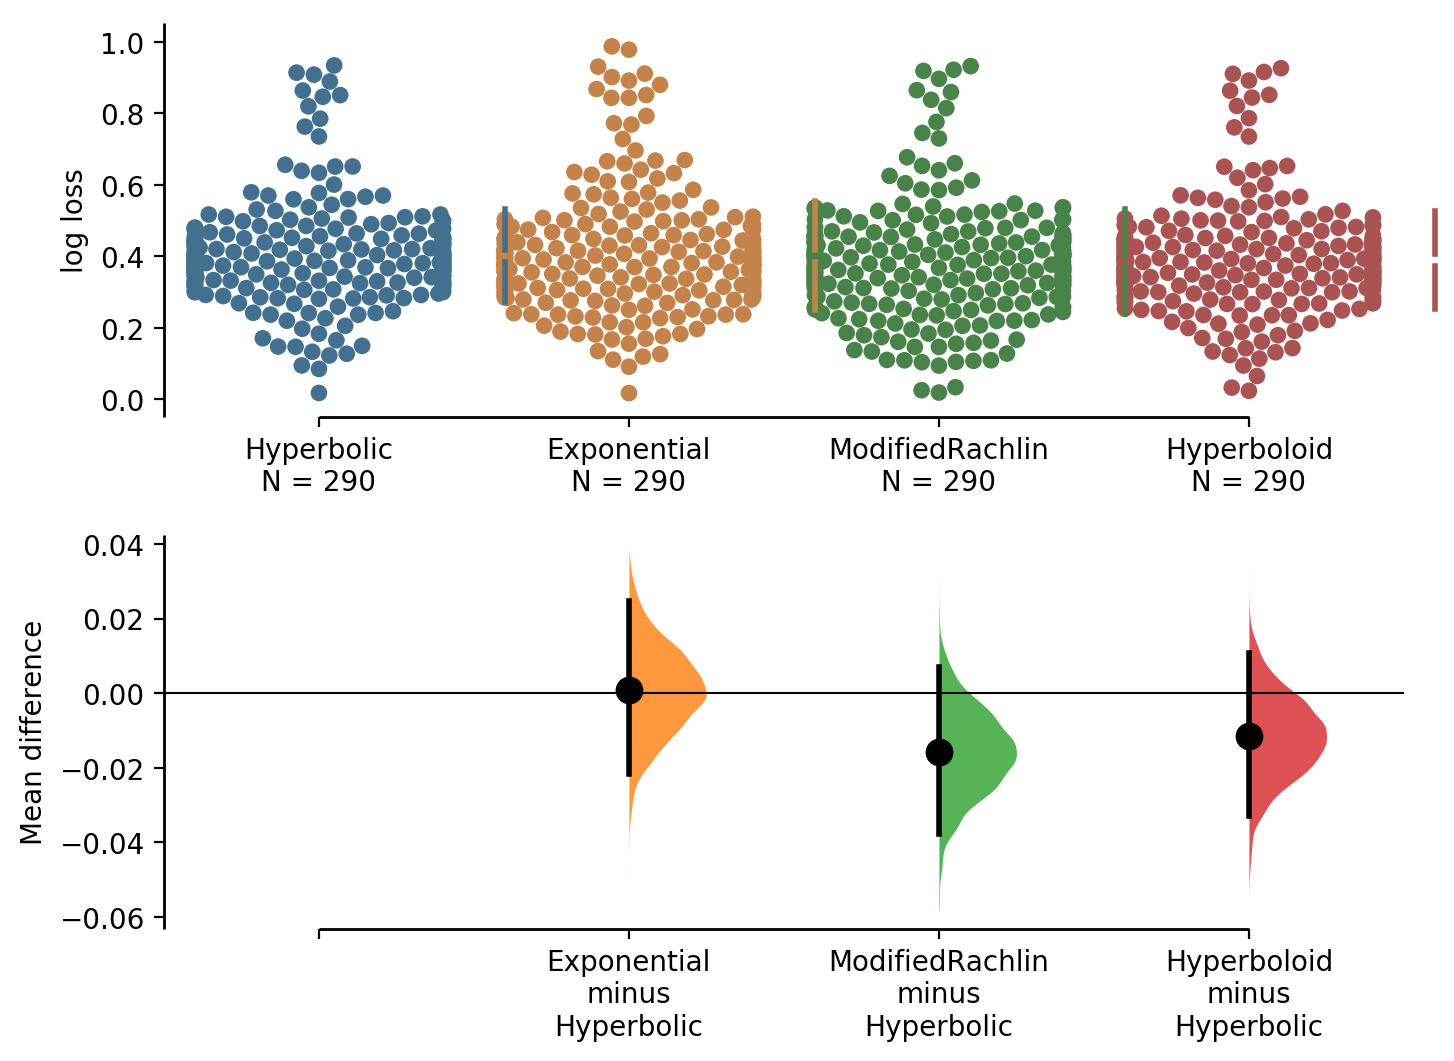

In [5]:
test = dabest.load(ll, idx=("Hyperbolic", "Exponential", "ModifiedRachlin", "Hyperboloid"), 
                   id_col="id", random_seed=12345)

test.mean_diff.plot(fig_size=(8,6), swarm_label='log loss');

test.mean_diff.statistical_tests

From this we can see that the Exponential model is marginally worse and the Modified Rachlin model is marginally better (in terms of Log Loss) than the Hyperbolic model. However there is not really very much in it, so there is nothing really to say here about which model is best in terms of the Log Loss metric.

## Analyse WAIC
The above analysis examined the goodness of fit. There was not really any reason to believe that any discount function was systematically better than another. So it might be a bit redundant to continue, but for the sake of completeness we examine the complexity penalised WAIC metric.

In [6]:
temp = [pd.read_csv('parameter_estimation_Exponential.csv'),
        pd.read_csv('parameter_estimation_Hyperbolic.csv'),
        pd.read_csv('parameter_estimation_ModifiedRachlin.csv'),
        pd.read_csv('parameter_estimation_Hyperboloid.csv')]

data = pd.concat(temp, axis=0, ignore_index=True, sort=False)
data.head()

,id,commodity,condition,model,log_loss,AUC,WAIC,roc_auc,k,logk,s
0,JL,food,C,Exponential,0.156205,0.989094,13.885116,0.982722,0.000732,NaN,NaN
1,BJ,money,C,Exponential,0.303042,0.982029,25.247291,0.947829,0.001213,NaN,NaN
2,PF,food,C,Exponential,0.285508,0.935131,24.150502,0.949878,0.004522,NaN,NaN
3,LS,money,C,Exponential,0.400888,0.949418,31.816975,0.881805,0.003491,NaN,NaN
4,DN,money,C,Exponential,NaN,0.999115,1.714244,NaN,0.000059,NaN,NaN


In [7]:
waic = {'Exponential': data['WAIC'][data['model']=='Exponential'].values,
        'Hyperbolic': data['WAIC'][data['model']=='Hyperbolic'].values,
        'ModifiedRachlin': data['WAIC'][data['model']=='ModifiedRachlin'].values, 
        'Hyperboloid': data['WAIC'][data['model']=='Hyperboloid'].values}
waic = pd.DataFrame.from_dict(waic)
waic.head()

,Exponential,Hyperbolic,ModifiedRachlin,Hyperboloid
0,13.885116,13.465510,10.682432,10.585629
1,25.247291,24.237698,10.927744,17.306034
2,24.150502,26.134721,27.313627,26.572725
3,31.816975,29.070501,31.361375,30.358123
4,1.714244,1.967226,1.958105,1.687478


In [8]:
# calculate delta WAIC, ie the WAIC realtive to the best (lowest) WAIC value
dwaic = waic.apply(lambda x: x-np.min(x), axis=1)
dwaic.head()

,Exponential,Hyperbolic,ModifiedRachlin,Hyperboloid
0,3.299487,2.879881,0.096803,0.000000
1,14.319548,13.309954,0.000000,6.378291
2,0.000000,1.984219,3.163124,2.422223
3,2.746473,0.000000,2.290873,1.287622
4,0.026766,0.279749,0.270627,0.000000


,control,test,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Hyperbolic,Exponential,mean difference,False,0.506021,95,-0.473637,1.877815,0.382875,-0.873525,0.382728,-0.873525,5.025586e-07,55485.0
1,Hyperbolic,ModifiedRachlin,mean difference,False,-0.671821,95,-1.251615,-0.231936,0.010178,2.582438,0.010047,2.582438,6.084774e-01,43917.0
2,Hyperbolic,Hyperboloid,mean difference,False,-0.722529,95,-1.333204,-0.205124,0.011123,2.548456,0.011069,2.548456,4.325619e-01,46662.0


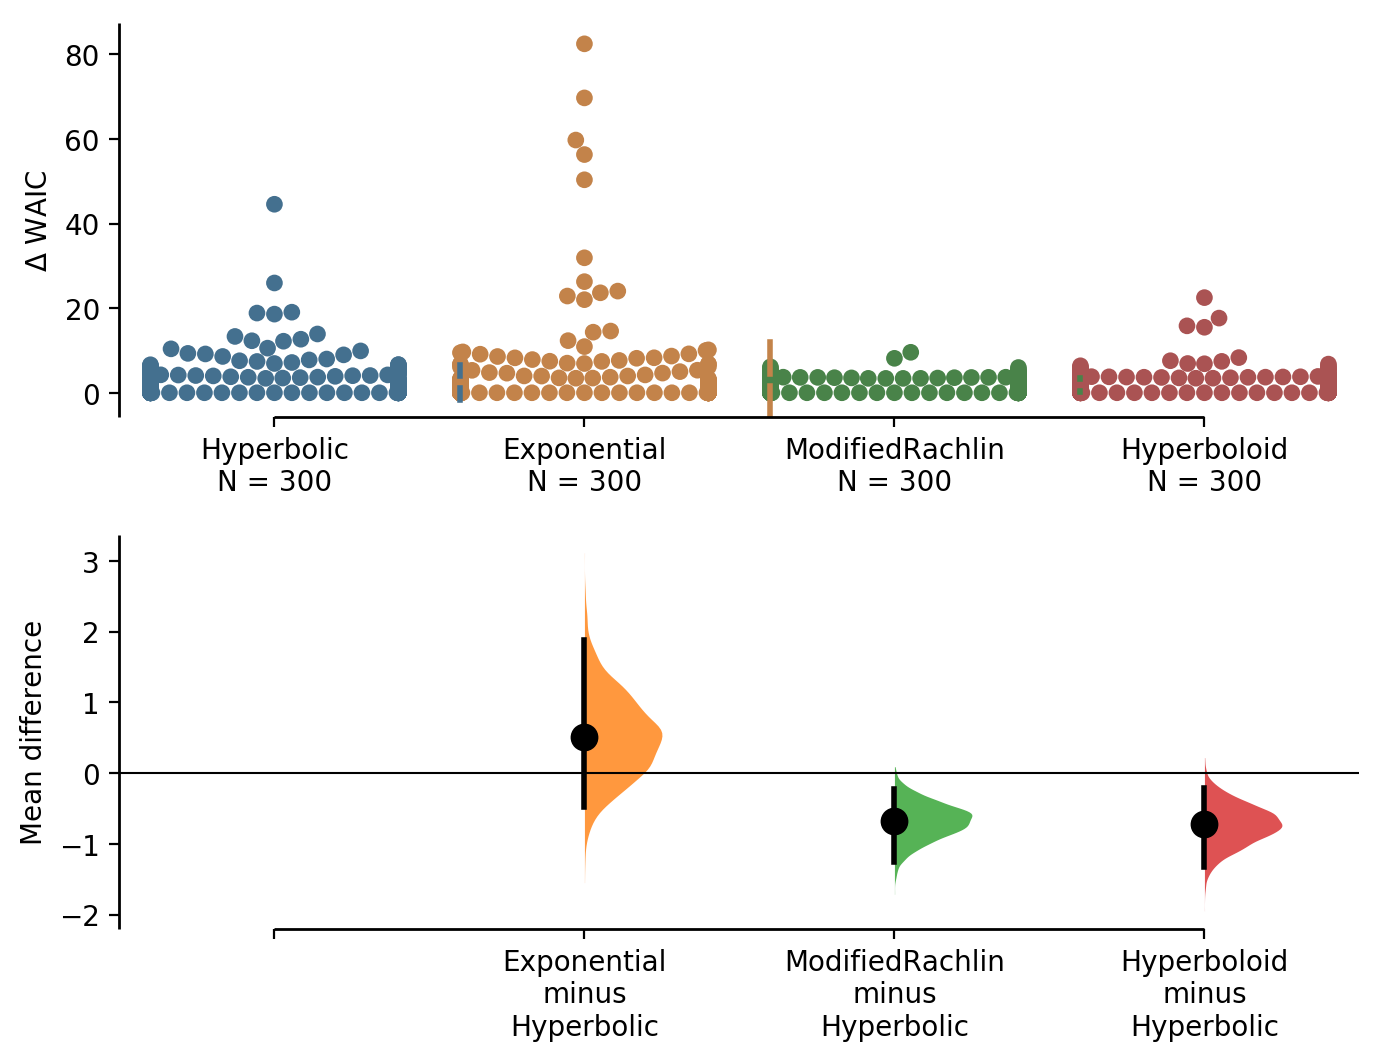

In [9]:
test = dabest.load(dwaic, idx=("Hyperbolic", "Exponential", "ModifiedRachlin", "Hyperboloid"), 
                   random_seed=12345)

test.mean_diff.plot(fig_size=(8,6), swarm_label='$\Delta$ WAIC');

test.mean_diff.statistical_tests

Again, there is no real reason to believe that one of the discount functions is better than the others. There is a hint that the Exponential discount function is worse, and the Modified Rachlin is _slightly_ better, but nothing real to note here.

## Examine goodness of fit: Under the Receiver Operating Characteristic Curve 
The Bayesian scoring of raw discounting data is essentially a classification task. This means we can use Receiver Operating Characteristic (methods) to test the ability of each model to predict the actual response data. This is a bit easier to interpret compared to the Log Loss measure above. For example, if the Area Under the ROC curve is 0.5, then the discount function can only distinguish between delayed or immediate choices at change. But if the Area Under the ROC curve is 1, then we can perfectly separate the delayed and immediate choices with the discount function. AUC values below 0.5 mean worse than guessing.

In [50]:
roc_auc = {'Exponential': data['roc_auc'][data['model']=='Exponential'].values,
      'Hyperbolic': data['roc_auc'][data['model']=='Hyperbolic'].values,
      'ModifiedRachlin': data['roc_auc'][data['model']=='ModifiedRachlin'].values, 
      'Hyperboloid': data['roc_auc'][data['model']=='Hyperboloid'].values}
roc_auc = pd.DataFrame.from_dict(roc_auc)

,control,test,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Hyperbolic,Exponential,mean difference,False,0.006519,95,-0.016873,0.028562,0.582666,-0.549805,0.582665,-0.549805,0.031221,37702.5
1,Hyperbolic,ModifiedRachlin,mean difference,False,0.001597,95,-0.021709,0.023621,0.893245,-0.134259,0.893245,-0.134259,0.434792,40473.5
2,Hyperbolic,Hyperboloid,mean difference,False,0.004226,95,-0.018564,0.026047,0.718891,-0.360117,0.718891,-0.360117,0.215007,39547.5


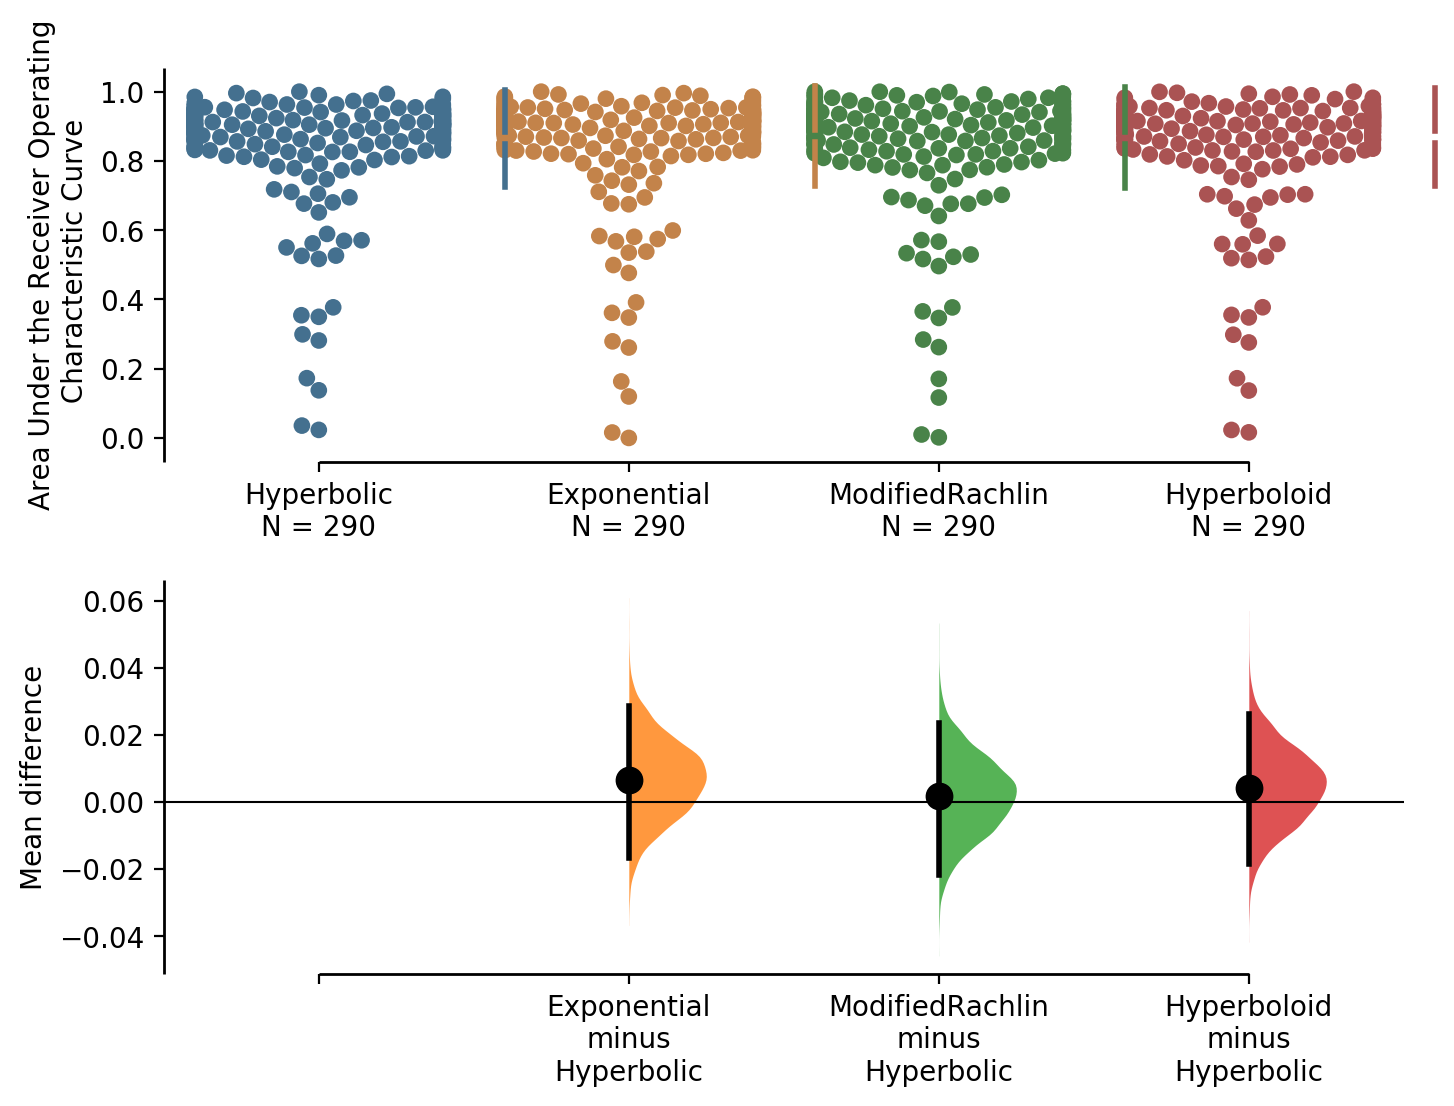

In [51]:
test = dabest.load(roc_auc, idx=("Hyperbolic", "Exponential", "ModifiedRachlin", "Hyperboloid"), 
                   id_col="id", random_seed=12345)

test.mean_diff.plot(fig_size=(8,6), swarm_label='Area Under the Receiver Operating\n Characteristic Curve');

test.mean_diff.statistical_tests

Make and export a table of summary stats for the ROC AUC values for each discount function.

In [52]:
rows = []
for dfunc in ['Exponential', 'Hyperbolic', 'ModifiedRachlin', 'Hyperboloid']:
    nans_removed = np.array([x for x in roc_auc[dfunc].values if str(x) != 'nan'])
    hpd = pymc3.stats.hpd(nans_removed)
    median = np.median(nans_removed)
    rows.append(pd.DataFrame({'dfunc': [dfunc], 
                              'median': [median], 
                              'hpd_lower': [hpd[0]], 
                              'hpd_upper': [hpd[1]]}))

roc_auc_stats = pd.concat(rows)
roc_auc_stats.to_csv('roc_auc_stats.csv', index=False)
roc_auc_stats

,dfunc,median,hpd_lower,hpd_upper
0,Exponential,0.912771,0.574490,1.00000
0,Hyperbolic,0.904281,0.569205,1.00000
0,ModifiedRachlin,0.905362,0.566873,1.00000
0,Hyperboloid,0.907785,0.559219,0.99675
